# A notebook to read in the latest COVID-19 numbers and do a little analysis

[update from download button here](https://www.kaggle.com/imdevskp/corona-virus-report)  
[or here](https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset)  
Brian Silverstein  
March 2020

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import datetime
from covid_analysis_funcs import *

In [2]:
def plot_state_list(state_names, first_date=None, latest_date=None):
    if first_date is None:
        first_date = datetime.datetime(2020,1,20)
    if latest_date is None:
        latest_date = max(df_us_data.Datetimes) + datetime.timedelta(days=0)
    
    fig, ax = plt.subplots(3,2, figsize=(16,16))

    for state_name in state_names:
        df = df_us_data[df_us_data['Province/State']== state_name].copy()
        df.sort_values('Datetimes', inplace=True)

        plot_one_trace(df, ax, first_date=first_date, latest_date=latest_date, 
                       markersize=30, label=state_name)
        
    format_axis(first_date, latest_date, ax)

In [3]:
# df_all_data = pd.read_csv("covid_19_clean_complete.csv")
df_all_data = pd.read_csv("novel-corona-virus-2019-dataset/covid_19_data.csv")
df_all_data['Datetimes'] = [datetime.datetime.strptime(date,"%m/%d/%Y") for
                            date in df_all_data.ObservationDate]

In [4]:
df_all_data

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Datetimes
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,2020-01-22
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0,2020-01-22
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0,2020-01-22
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,2020-01-22
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0,2020-01-22
...,...,...,...,...,...,...,...,...,...
9419,9420,03/27/2020,Wyoming,US,2020-03-27 23:27:48,70.0,0.0,0.0,2020-03-27
9420,9421,03/27/2020,Xinjiang,Mainland China,2020-03-27 23:27:48,76.0,3.0,73.0,2020-03-27
9421,9422,03/27/2020,Yukon,Canada,2020-03-27 23:27:48,3.0,0.0,0.0,2020-03-27
9422,9423,03/27/2020,Yunnan,Mainland China,2020-03-27 23:27:48,180.0,2.0,172.0,2020-03-27


In [5]:
df_us_data = df_all_data[df_all_data['Country/Region']=='US']

df_us_data.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Datetimes
9414,9415,03/27/2020,Virginia,US,2020-03-27 23:27:48,607.0,10.0,0.0,2020-03-27
9415,9416,03/27/2020,Washington,US,2020-03-27 23:27:48,3477.0,157.0,0.0,2020-03-27
9416,9417,03/27/2020,West Virginia,US,2020-03-27 23:27:48,76.0,0.0,0.0,2020-03-27
9418,9419,03/27/2020,Wisconsin,US,2020-03-27 23:27:48,926.0,14.0,0.0,2020-03-27
9419,9420,03/27/2020,Wyoming,US,2020-03-27 23:27:48,70.0,0.0,0.0,2020-03-27


In [6]:
df_us_country = df_us_data.groupby(['ObservationDate']).sum()
df_us_country['Datetimes'] = [datetime.datetime.strptime(date,"%m/%d/%Y") for 
                              date in df_us_country.index]
df_us_country.tail()

,SNo,Confirmed,Deaths,Recovered,Datetimes
ObservationDate,,,,,
03/23/2020,480670,43667.0,552.0,0.0,2020-03-23
03/24/2020,506706,53740.0,706.0,348.0,2020-03-24
03/25/2020,516077,65778.0,942.0,361.0,2020-03-25
03/26/2020,534032,83836.0,1209.0,681.0,2020-03-26
03/27/2020,552145,101657.0,1581.0,869.0,2020-03-27


In [7]:
country_list = np.sort(list(set(df_all_data['Country/Region'])))
state_set = set(df_us_data['Province/State'])
# state_set.remove('Grand Princess')
state_list = np.sort(list(state_set))
print(country_list)
print()
print(state_list)

[' Azerbaijan' "('St. Martin',)" 'Afghanistan' 'Albania' 'Algeria'
 'Andorra' 'Angola' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahamas, The' 'Bahrain'
 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bhutan'
 'Bolivia' 'Bosnia and Herzegovina' 'Brazil' 'Brunei' 'Bulgaria'
 'Burkina Faso' 'Burma' 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Cape Verde' 'Cayman Islands' 'Central African Republic' 'Chad'
 'Channel Islands' 'Chile' 'Colombia' 'Congo (Brazzaville)'
 'Congo (Kinshasa)' 'Costa Rica' 'Croatia' 'Cuba' 'Curacao' 'Cyprus'
 'Czech Republic' 'Denmark' 'Diamond Princess' 'Djibouti' 'Dominica'
 'Dominican Republic' 'East Timor' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia'
 'Faroe Islands' 'Fiji' 'Finland' 'France' 'French Guiana' 'Gabon'
 'Gambia' 'Gambia, The' 'Georgia' 'Germany' 'Ghana' 'Gibraltar' 'Greece'
 'Greenland' 'Grenada' 'Guadeloupe' 'Guam' 'Guatemala

In [8]:
wa_regions = set()
for region in state_list:
    if ", WA" in region:
        wa_regions.add(region)
wa_regions

{'Clark County, WA',
 'Grant County, WA',
 'Jefferson County, WA',
 'King County, WA',
 'Kittitas County, WA',
 'Pierce County, WA',
 'Seattle, WA',
 'Snohomish County, WA',
 'Spokane County, WA',
 'Unassigned Location, WA'}

In [9]:
il_regions = set()
for region in state_list:
    if ", IL" in region:
        il_regions.add(region)
il_regions

{'Chicago, IL', 'Cook County, IL'}

In [10]:
latest_date = max(df_us_data.Datetimes).strftime('%m/%d/%y')
print(f"Latest date = {latest_date:9} {'':20} Rates based on last 7 days") 
print(44*" ", "Confirmed               Dead")
print(42*" ", 2*" mult  daily     days to")
print("State name        confirmed  dead recovered", 2*"  up  increase  double  ")
for state_name in state_list:
    if "," not in state_name:
        state_df = df_us_data[df_us_data['Province/State']== state_name]
        state_latest_date = max(state_df.Datetimes)

        row_data = get_row_data(state_df, state_latest_date)
        last_week = stats_last_7_days(state_df, state_latest_date)
        print(f"{state_name:20}{row_data[0]:7}{row_data[1]:6}  {row_data[2]:8}",
              f"{last_week[0]:4.1f}x    {last_week[1]:4.1f}%   {last_week[2]:4.1f}  ",
              f"{last_week[3]:4.1f}x    {last_week[4]:4.1f}%   {last_week[5]:4.1f}")
      

Latest date = 03/27/20                       Rates based on last 7 days
                                             Confirmed               Dead
                                            mult  daily     days to mult  daily     days to
State name        confirmed  dead recovered   up  increase  double    up  increase  double  
Alabama                 587     4         0  7.1x    32.2%    2.2    0.0x     nan%    nan
Alaska                   58     1         0  4.8x    26.7%    2.7    0.0x     nan%    nan
American Samoa            0     0         0  0.0x     nan%    nan    0.0x     nan%    nan
Arizona                 665    13         0  8.5x    35.5%    2.0    0.0x     nan%    nan
Arkansas                381     3         0  4.0x    21.6%    3.3    0.0x     nan%    nan
California             4657    94         0  4.0x    22.2%    3.2    4.1x    24.6%    2.9
Chicago                   1     0         0  1.0x     0.0%    inf    0.0x     nan%    nan
Colorado               1433    27      

/Users/deborahwilliams/Documents/COVID and WFH/covid_analysis_funcs.py:7: RuntimeWarning: divide by zero encountered in log
  y_logs = list(np.log(y_values))
/Users/deborahwilliams/Documents/COVID and WFH/covid_analysis_funcs.py:142: RankWarning: Polyfit may be poorly conditioned
  c = do_exponential_curve_fit(times, confirmed)
/Users/deborahwilliams/Documents/COVID and WFH/covid_analysis_funcs.py:145: RuntimeWarning: divide by zero encountered in double_scalars
  confirmed_doubling_rate = 72/confirmed_daily_increase_pct
/Users/deborahwilliams/Documents/COVID and WFH/covid_analysis_funcs.py:152: RankWarning: Polyfit may be poorly conditioned
  c = do_exponential_curve_fit(times, deaths)
/Users/deborahwilliams/Documents/COVID and WFH/covid_analysis_funcs.py:155: RuntimeWarning: divide by zero encountered in double_scalars
  deaths_doubling_rate = 72/deaths_daily_increase_pct


  5.0x    24.8%    2.9    5.0x    28.3%    2.5
Washington             3477   157         0  2.3x    12.0%    6.0    1.9x     9.7%    7.4
West Virginia            76     0         0 10.9x    41.3%    1.7    0.0x     nan%    nan
Wisconsin               926    14         0  4.5x    22.2%    3.2    4.7x    22.5%    3.2
Wuhan Evacuee             4     0         0  1.0x     0.0%    inf    0.0x     nan%    nan
Wyoming                  70     0         0  3.7x    19.5%    3.7    0.0x     nan%    nan


In [11]:
for state_name in ['Washington', 'Texas', 'New York', 'Louisiana', 'Georgia']:
    df_state = df_us_data[df_us_data['Province/State'] == state_name]
    print("State name = ", state_name)
    printstuff(df_state)
    df_state.tail()
    print()

State name =  Washington
Rates based on last 7 days
Confirmed                      Dead
 multi-  daily      days to     multi-  daily      days to    
 plier   increase   double      plier   increase   double     
   2.3x  12.0%      6.0           1.9x   9.7%      7.4
Week summary
                Confirmed           Death       Recovered
date         total  today    total  today    total  today
03/20/2020     1524    148       83      9        0      0
03/21/2020     1793    269       94     11        0      0
03/22/2020     1997    204       97      3        0      0
03/23/2020     2221    224      109     12        0      0
03/24/2020     2328    107      116      7        0      0
03/25/2020     2591    263      133     17        0      0
03/26/2020     3207    616      150     17        0      0
03/27/2020     3477    270      157      7        0      0

State name =  Texas
Rates based on last 7 days
Confirmed                      Dead
 multi-  daily      days to     multi-  daily 

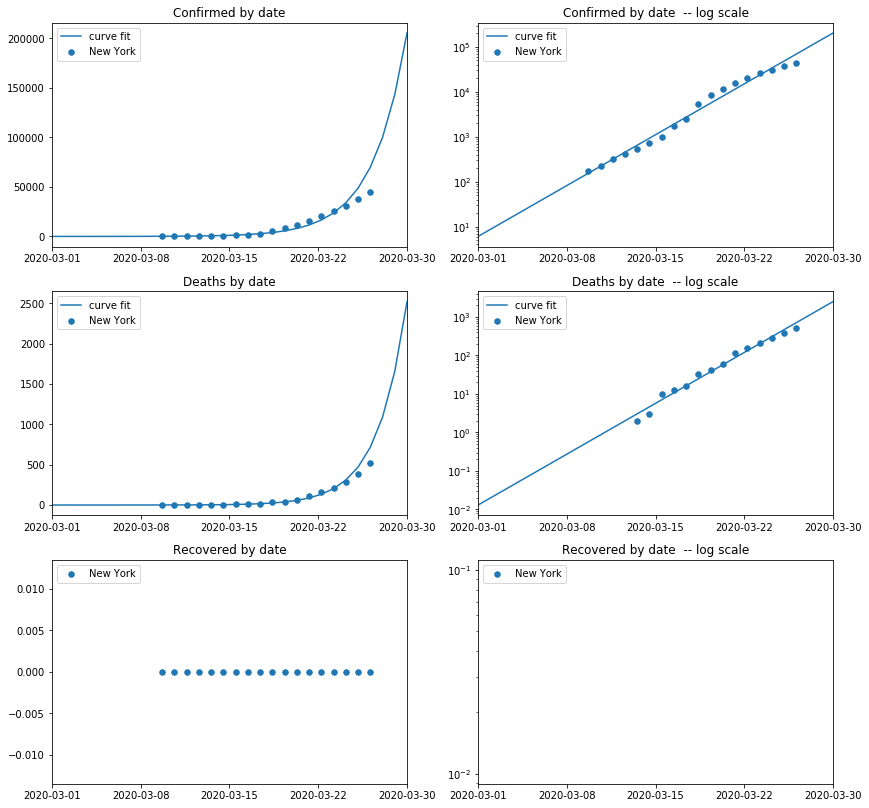

In [12]:
state_name = "New York"
df_state = df_us_data[df_us_data['Province/State'] == state_name]
plotstuff(df_state, datetime.datetime(2020,3,1), label=state_name)

Rates based on last 7 days
Confirmed                      Dead
 multi-  daily      days to     multi-  daily      days to    
 plier   increase   double      plier   increase   double     
   5.3x  26.7%      2.7           6.5x  30.8%      2.3
Week summary
                Confirmed           Death       Recovered
date         total  today    total  today    total  today
03/20/2020    19101   5421      244     44      147     39
03/21/2020    25493   6392      307     63      171     24
03/22/2020    33746   8253      427    120        0   -171
03/23/2020    43667   9921      552    125        0      0
03/24/2020    53740  10073      706    154      348    348
03/25/2020    65778  12038      942    236      361     13
03/26/2020    83836  18058     1209    267      681    320
03/27/2020   101657  17821     1581    372      869    188


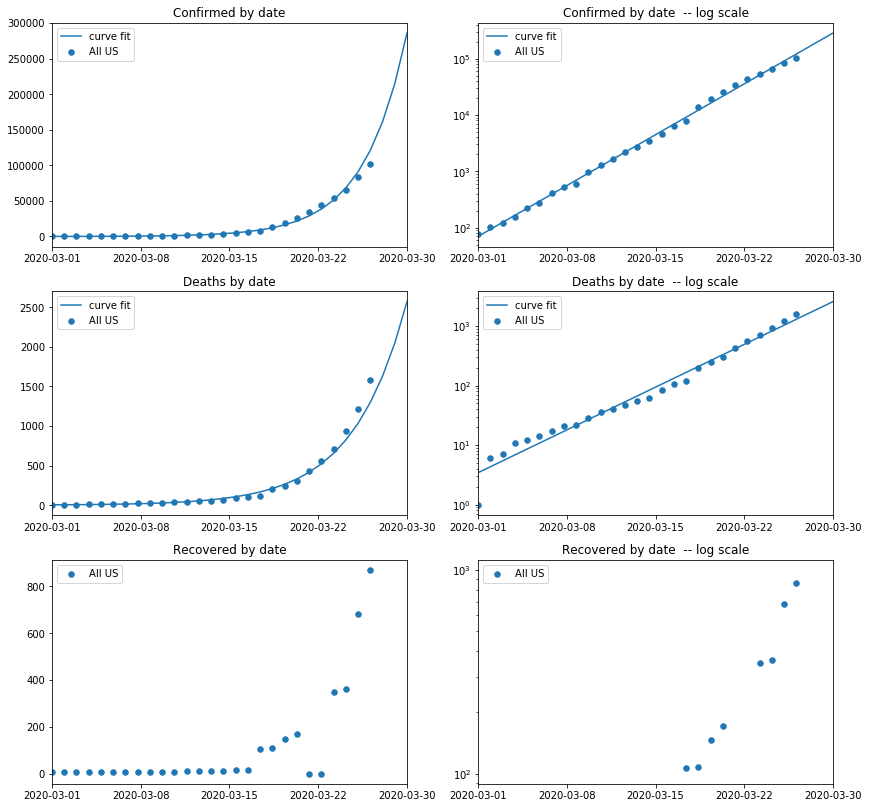

In [21]:
printstuff(df_us_country)
plotstuff(df_us_country, 
          first_date=datetime.datetime(2020,3,1),
          latest_date=datetime.datetime(2020,3,30),
          label="All US")

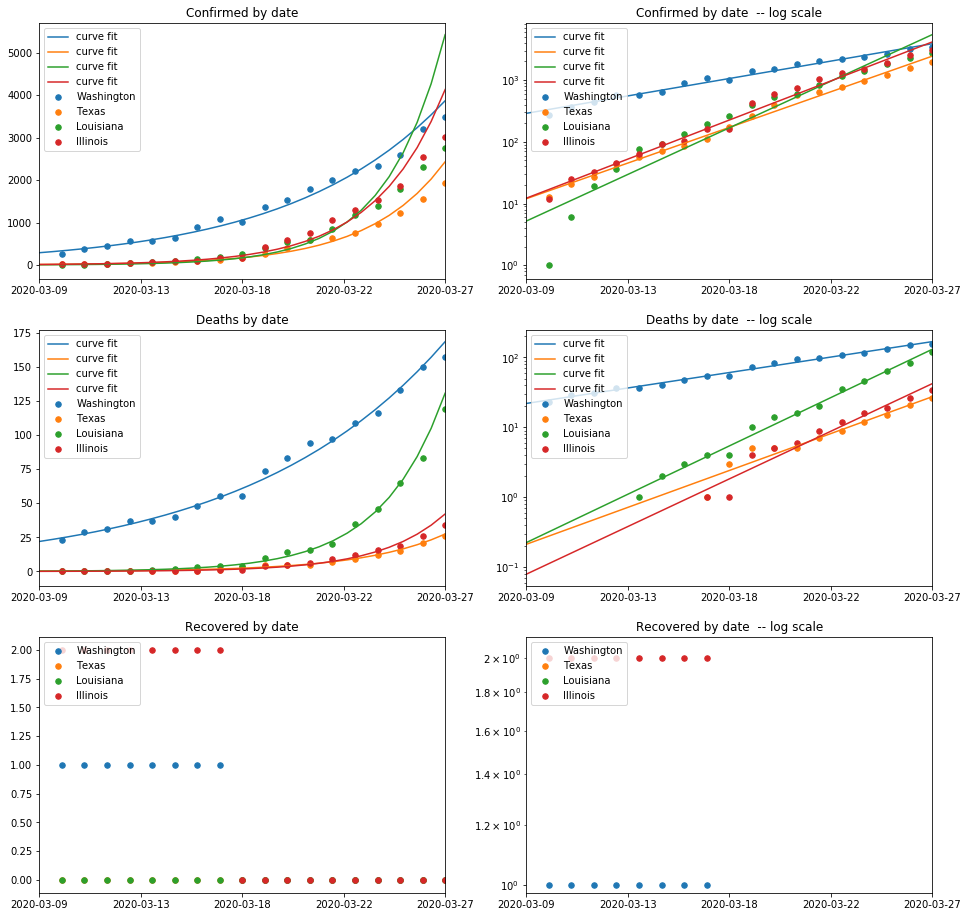

In [22]:
plot_state_list(['Washington', 'Texas', 'Louisiana', 'Illinois'], 
                first_date=datetime.datetime(2020,3,9))

In [15]:
# for state_name in ['Washington', 'Wyoming', 'North Dakota', 'Nebraska']:
#     df_state = df_us_data[df_us_data['Province/State'] == state_name]
#     print("State name = ", state_name)
#     printstuff(df_state)
#     df_state.tail()
#     print()

# plot_state_list(['Washington', 'Wyoming', 'North Dakota', 'Nebraska'], 
#                 first_date=datetime.datetime(2020,3,6))

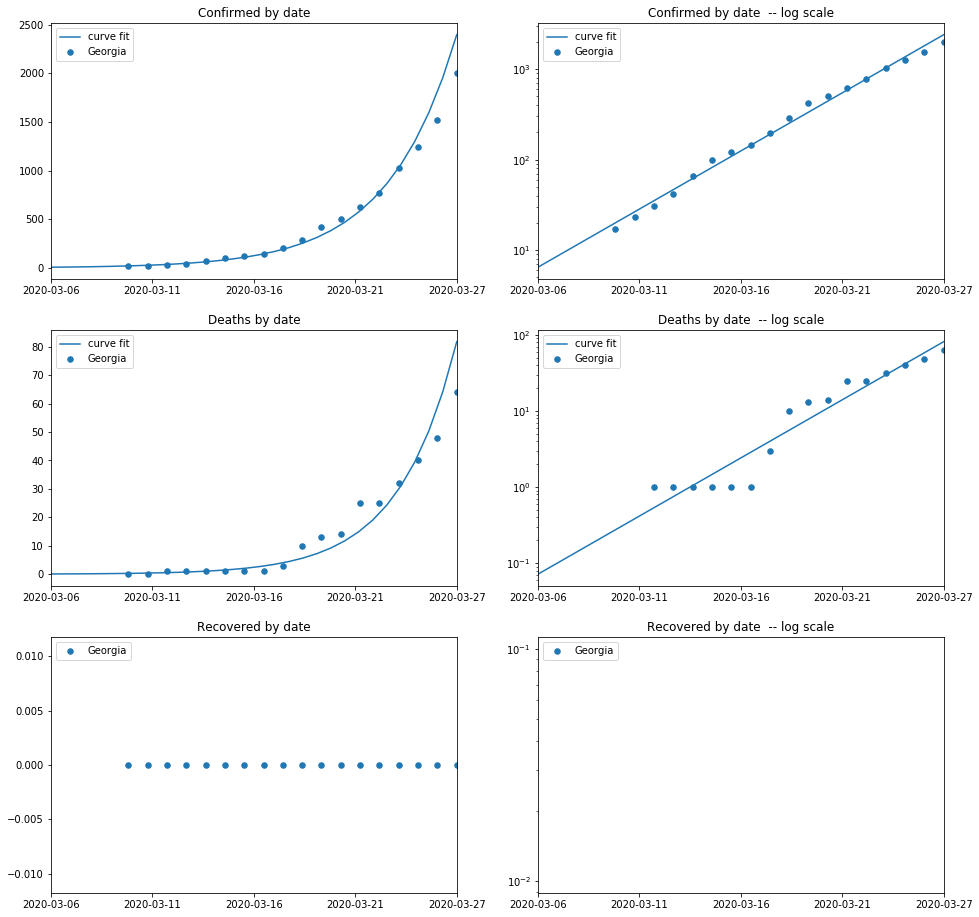

In [17]:
plot_state_list(['Georgia'], 
                first_date=datetime.datetime(2020,3,6))

In [18]:
wa_regions

{'Clark County, WA',
 'Grant County, WA',
 'Jefferson County, WA',
 'King County, WA',
 'Kittitas County, WA',
 'Pierce County, WA',
 'Seattle, WA',
 'Snohomish County, WA',
 'Spokane County, WA',
 'Unassigned Location, WA'}

/Users/deborahwilliams/Documents/COVID and WFH/covid_analysis_funcs.py:16: RankWarning: Polyfit may be poorly conditioned
  c = do_exponential_curve_fit(x_values, y_values)


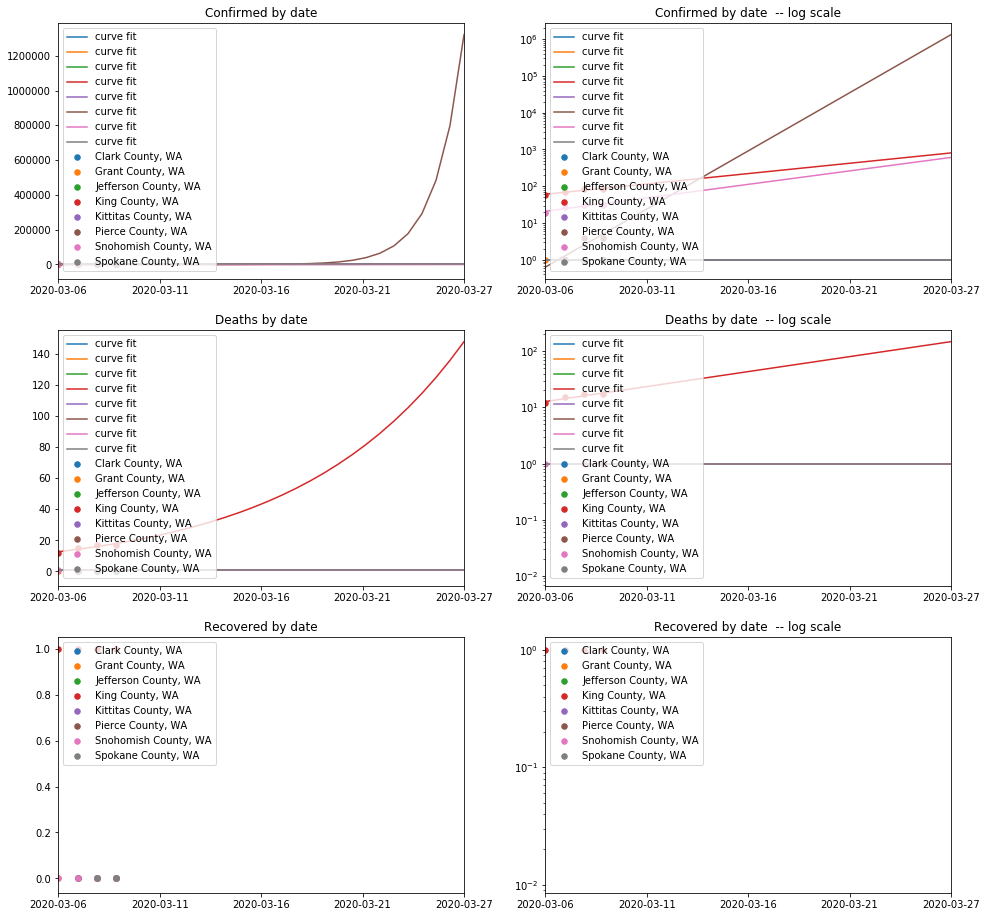

In [19]:
plot_state_list(['Clark County, WA', 'Grant County, WA', 'Jefferson County, WA',
                 'King County, WA', 'Kittitas County, WA','Pierce County, WA',
                 'Snohomish County, WA','Spokane County, WA'], 
                first_date=datetime.datetime(2020,3,6))